## Getting Started with Titanic - Kaggle
### [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic)

### With Tutorial: [Titanic Tutorial](https://www.kaggle.com/alexisbcook/titanic-tutorial)


In this notebook, I followed the tutorial and run with **jupyter notebook** instead of Kaggle notebook since I failed to get access to the sever of Kaggle notebook(XD).

As a result, please be aware that the **paths** included are all local, please replace with your paths before you run the code.

### 1 Load the data

In [219]:
print('>>> Where are my data?')
local_path = './titanic/'

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk(local_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

>>> Where are my data?
./titanic/CV_generated_submission.csv
./titanic/deeper_more_estimators_submission.csv
./titanic/deeper_rfmodel_submission.csv
./titanic/gender_submission.csv
./titanic/more_estimators_submission.csv
./titanic/more_features_submission.csv
./titanic/my_submission.csv
./titanic/test.csv
./titanic/train.csv


In [220]:
print('To load csv file, I use read_csv() from pandas.')
print('The table diplayed below is a beginning part of the csv file.')
train_data = pd.read_csv(local_path + "/train.csv")
train_data.head()

To load csv file, I use read_csv() from pandas.
The table diplayed below is a beginning part of the csv file.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [221]:
print('Similarly, load test data with pandas.')
test_data = pd.read_csv(local_path + "test.csv")
test_data.head()

Similarly, load test data with pandas.


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### 2 Improve the example submission (gender_submission.csv)

I have submitted the example submission and get a \'terrible\' result, so following the tutorial, I\'m going to improve my score.

In [222]:
print('First of all, let\'s see indeed how many female had actually died.\n')

women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

First of all, let's see indeed how many female had actually died.

% of women who survived: 0.7420382165605095


In [223]:
print('For further idea, check the same rate of male.')

men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

For further idea, check the same rate of male.
% of men who survived: 0.18890814558058924


#### Random Forest

Now, I'm building a model named of 'Random Forest'.

Quote:
> We'll build what's known as a random forest model. This model is constructed of several "trees" (there are three trees in the picture below, but we'll construct 100!) that will individually consider each passenger's data and vote on whether the individual survived. Then, the random forest model makes a democratic decision: the outcome with the most votes wins!

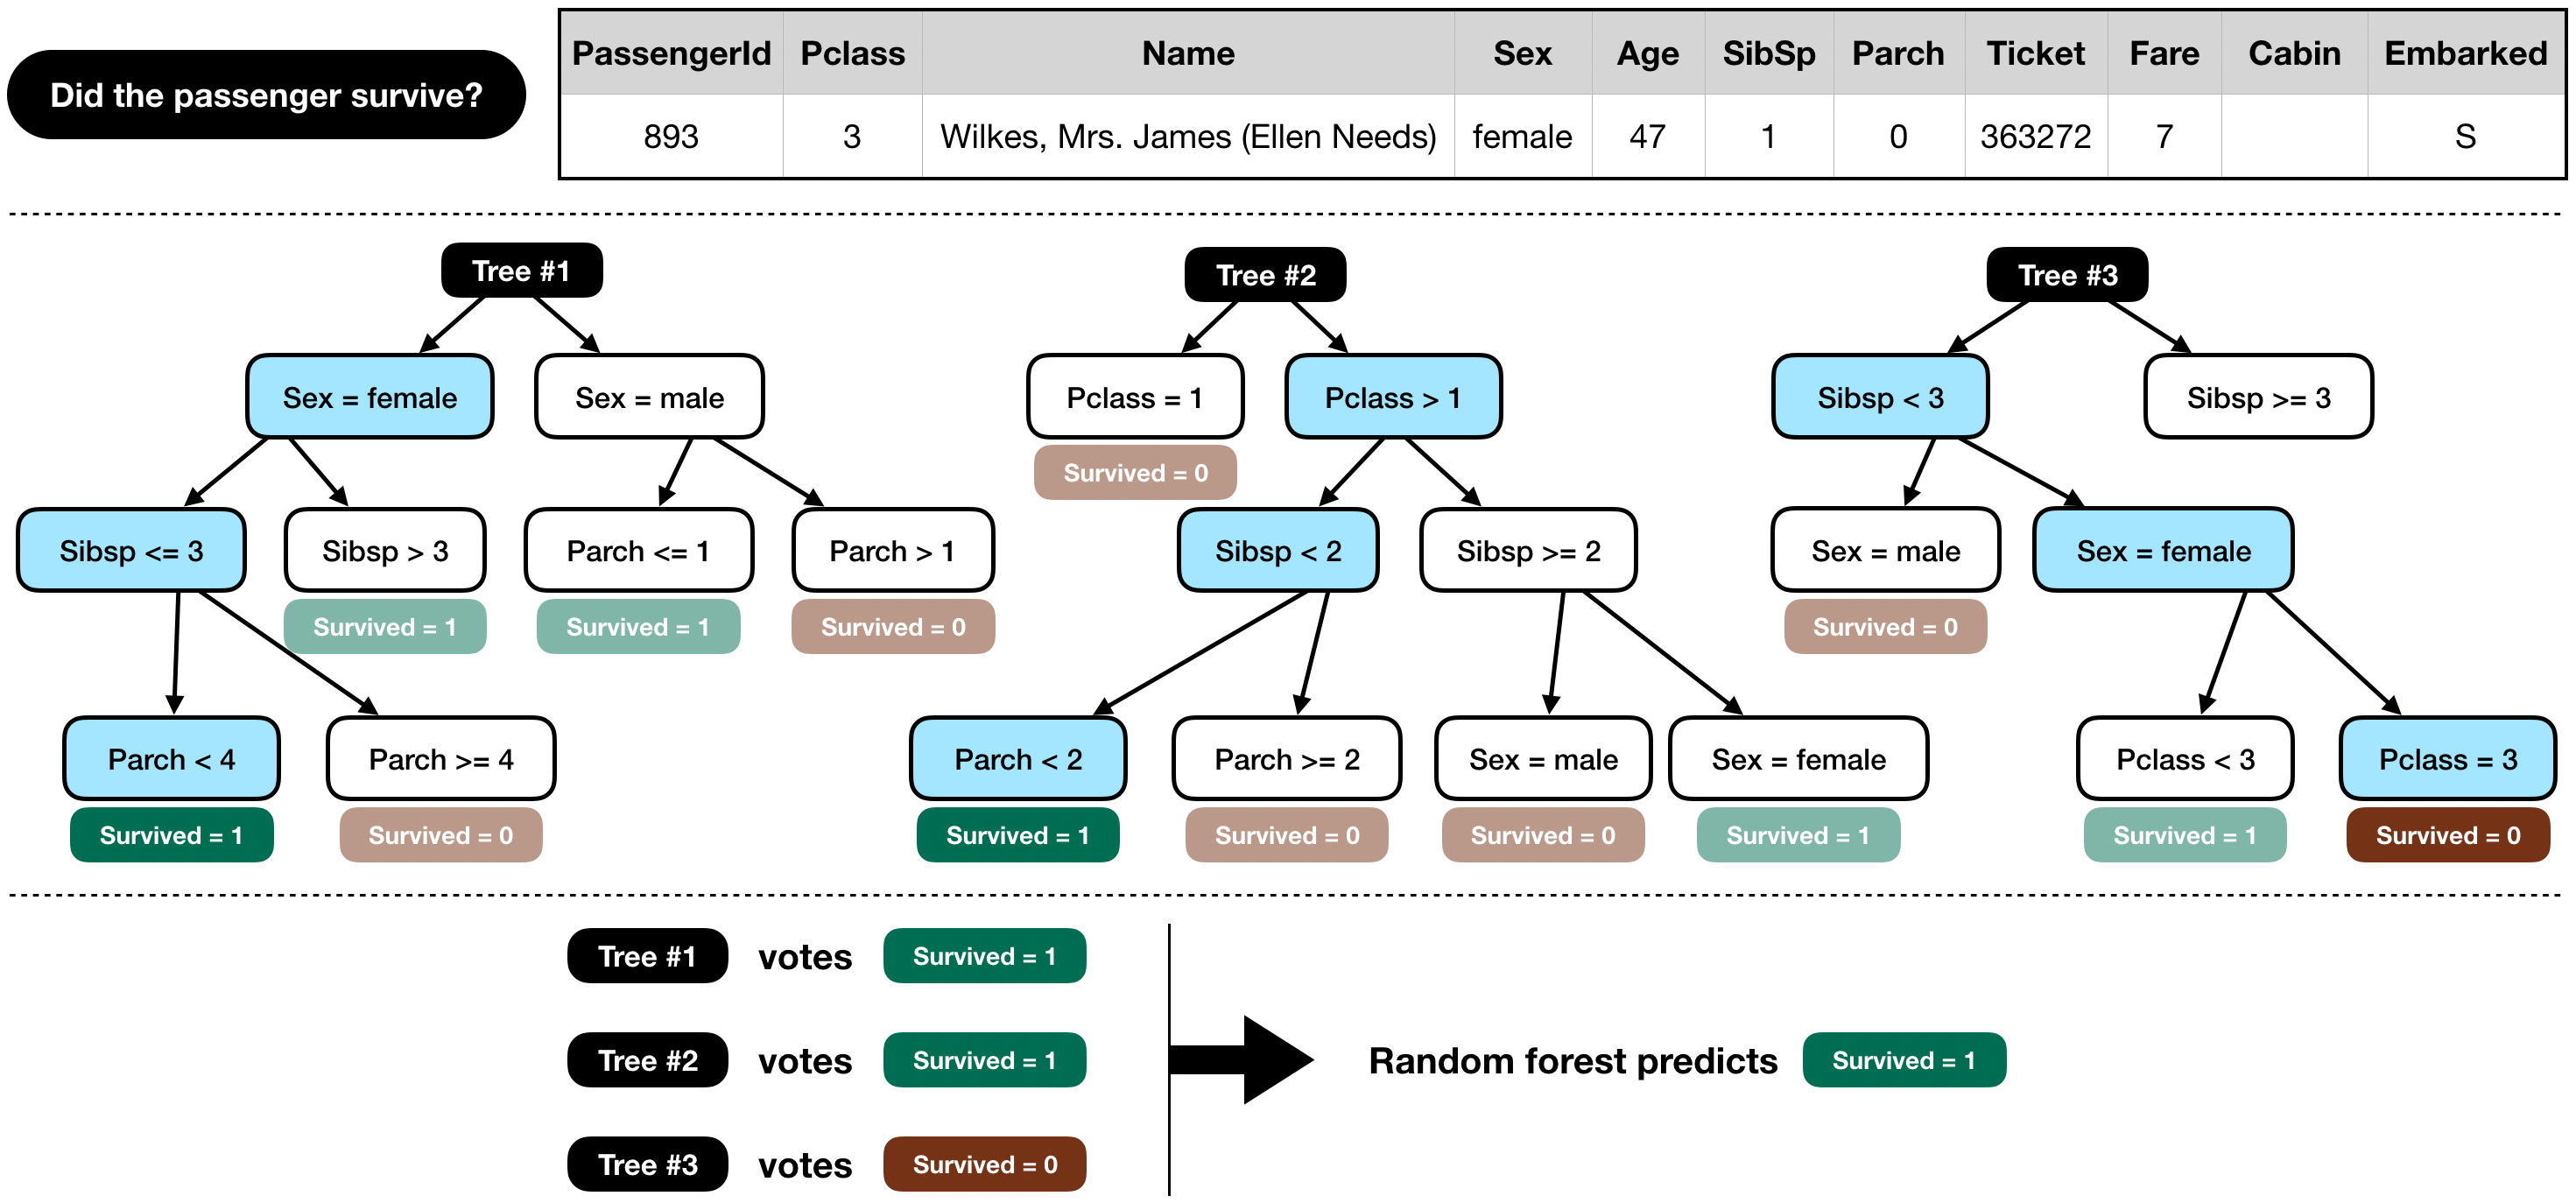

> The code cell below looks for patterns in four different columns (**"Pclass", "Sex", "SibSp", and "Parch"**) of the data. It constructs the trees in the random forest model based on patterns in the **train.csv** file, before generating predictions for the passengers in **test.csv**. The code also saves these new predictions in a CSV file my_submission.csv.

In [225]:
print('In this cell, module sklearn is called.')
print('If sklearn is not found, try install it with pip.\n')

from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

train_data["relative"] = train_data["SibSp"] + train_data["Parch"]
test_data["relative"] = test_data["SibSp"] + test_data["Parch"]

features = ["Pclass", "Sex", "SibSp", "Parch", "relative"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv(local_path + 'my_upgraded_submission.csv', index=False)
print("Your submission was successfully saved!")

In this cell, module sklearn is called.
If sklearn is not found, try install it with pip.

Your submission was successfully saved!


#### Try a second submission!
So far, a better result was successfully generated.

Submitting this prediction, I got a increment of about **0.01(0.775511 - 0.76555)** on my score.

It may seem to be of no sense, however, I believe it is a good start at least.

### 3 Experiments

From now on, I said goodbye to the tutorial and tried to get further progress myself.

Good luck to me.

In [34]:
print('What if a larger estimator number?')
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=300, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv(local_path + 'more_estimators_submission.csv', index=False)
print("Your submission was successfully saved!")

What if a larger estimator number?
Your submission was successfully saved!


Oops, NO DIFFERENCE.

In [35]:
print('What if a deeper model?')
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv(local_path + 'deeper_rfmodel_submission.csv', index=False)
print("Your submission was successfully saved!")

What if a deeper model?
Your submission was successfully saved!


Well... A deeper model of max_depth = 8 even lower the accuracy...

In [42]:
print('What if a deeper model with more estimateors?')
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=300, max_depth=8, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv(local_path + 'deeper_more_estimators_submission.csv', index=False)
print("Your submission was successfully saved!")

What if a deeper model with more estimateors?
Your submission was successfully saved!


NO DIFFERENCE Again. These kind of 'improvement' doesn't work!

In [40]:
print('I\'m glad to found a useful tool GridSearchCV from sklearn to help improve the RF model, I\'ll try below:)')
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=5, random_state=1)

tuned_parameters = [{'min_samples_leaf':[1,2,3,4], 'n_estimators':[50,100,300,500]}]

clf = GridSearchCV(estimator=model,param_grid=tuned_parameters, cv=5, n_jobs=1)

clf.fit(X, y)
print('Best parameters:')
print(clf.best_params_)

I'm glad to found a useful tool GridSearchCV from sklearn to help improve the RF model, I'll try below:)
Best parameters:
{'min_samples_leaf': 1, 'n_estimators': 300}


In [43]:
print('With the parameters above:')
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=300, min_samples_leaf=1, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv(local_path + 'CV_generated_submission.csv', index=False)
print("Your submission was successfully saved!")

With the parameters above:
Your submission was successfully saved!


In this case, I got back to the previous best entry~

#### Why not try to take more features into account?

I decided to add 'Age' and 'Fare' and see what would happen.

Since there'r lots of invalid cell, preprocessing is important.

In [82]:
print('NaN or None cell in \'Age\': ' + str(len(train_data)-train_data['Age'].count()))
print('NaN or None cell in \'Fare\': ' + str(len(train_data)-train_data['Fare'].count()))

NaN or None cell in 'Age': 177
NaN or None cell in 'Fare': 0


Column Age contains many invalid cells, replace them with the mean of Age column. 

In [90]:
train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)
print('NaN or None cell in \'Age\': ' + str(len(train_data)-train_data['Age'].count()))

NaN or None cell in 'Age': 0


NaN or None values are now replaced by the mean of Age column.

Emmm... No progress...

I decide to Calm down and Have a overlook of the data.

## New Retry

In [209]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

train_data = pd.read_csv(local_path + "/train.csv")
# train_data.head()
test_data = pd.read_csv(local_path + "test.csv")
# test_data.head()

In [210]:
train_corr = train_data.drop('PassengerId',axis=1).corr()
train_corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


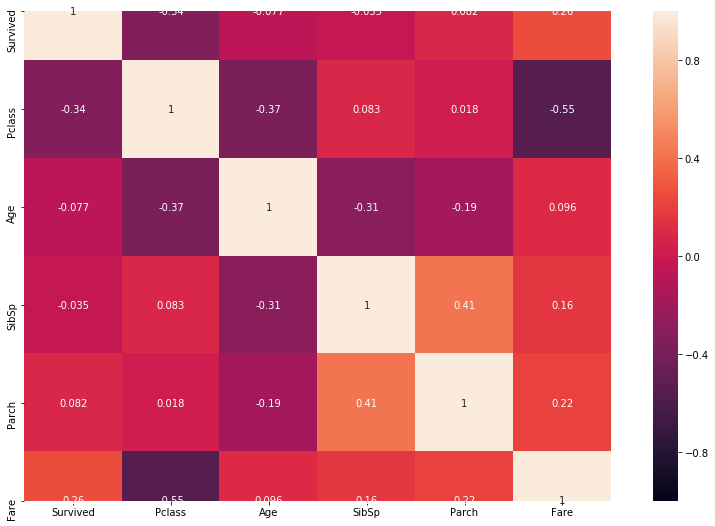

In [211]:
axes = plt.subplots(figsize=(15,9))
axes = sns.heatmap(train_corr, vmin=-1, vmax=1 , annot=True , square=True)

In [212]:
train_data.groupby(['Pclass'])['Pclass', 'Survived'].mean()

,Pclass,Survived
Pclass,,
1,1.0,0.629630
2,2.0,0.472826
3,3.0,0.242363


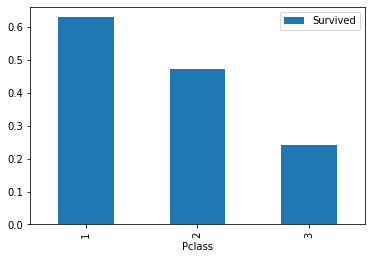

In [213]:
train_data[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar()

### Feature Engineering

In [214]:
# cat. train and test.
test_data['Survived'] = 0
data = train_data.append(test_data)

# get_dummies -> one-hot
data = pd.get_dummies(data,columns=['Pclass'])
data = pd.get_dummies(data,columns=["Sex"])
data['relative'] = data['SibSp'] + data['Parch']
data = pd.get_dummies(data,columns = ['SibSp','Parch','relative'])
data = pd.get_dummies(data,columns=["Embarked"])
data["Fare"].fillna(14.435422,inplace=True)
data.loc[data["Age"].isnull() ,"age_death"] = 1
data.loc[data["Age"].notnull() ,"age_death"] = 0
data = pd.get_dummies(data,columns=['age_death'])

D:\TOOLS\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [215]:
# Age predicting
missing_age = data.drop(['Survived','Cabin', 'Name', 'Ticket'],axis=1)

missing_age_train = missing_age[missing_age['Age'].notnull()]
missing_age_test = missing_age[missing_age['Age'].isnull()]

missing_age_X_train = missing_age_train.drop(['Age'], axis=1)
missing_age_Y_train = missing_age_train['Age']
missing_age_X_test = missing_age_test.drop(['Age'], axis=1)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

ss.fit(missing_age_X_train)
missing_age_X_train = ss.transform(missing_age_X_train)
missing_age_X_test = ss.transform(missing_age_X_test)

from sklearn import linear_model
lin = linear_model.BayesianRidge()

lin.fit(missing_age_X_train,missing_age_Y_train)

data.loc[(data['Age'].isnull()), 'Age'] = lin.predict(missing_age_X_test)

In [216]:
train_data = data[:891]
test_data = data[891:]

X = train_data.drop(['Survived','Cabin', 'Name', 'Ticket'],axis=1)
y = train_data['Survived']
X_test = test_data.drop(['Survived','Cabin', 'Name', 'Ticket'],axis=1)

In [217]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=150, min_samples_leaf=2, max_depth=6, oob_score=True)
model.fit(X, y)
model.oob_score_

predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv(local_path + 'deeper_more_estimators_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


So far, I've tried learning with Kaggle, glad to learn so much incredible method in data science.